In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import jinja2



#Reading Dataset

In [2]:
df_train=pd.read_csv("Train.csv")
df_test=pd.read_csv("Test.csv")

In [3]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#start data analysing

In [4]:
df_train.count()

Item_Identifier              8523
Item_Weight                  7060
Item_Fat_Content             8523
Item_Visibility              8523
Item_Type                    8523
Item_MRP                     8523
Outlet_Identifier            8523
Outlet_Establishment_Year    8523
Outlet_Size                  6113
Outlet_Location_Type         8523
Outlet_Type                  8523
Item_Outlet_Sales            8523
dtype: int64

In [5]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
df_train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [7]:
df_train.shape

(8523, 12)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


C:\Users\N.Srinivas\anaconda new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Weight'>

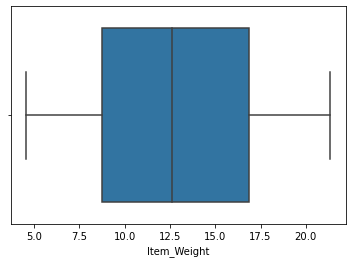

In [9]:
sns.boxplot(df_train['Item_Weight'])

In [10]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].median(),inplace=True)

In [11]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [12]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [14]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

C:\Users\N.Srinivas\anaconda new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Weight'>

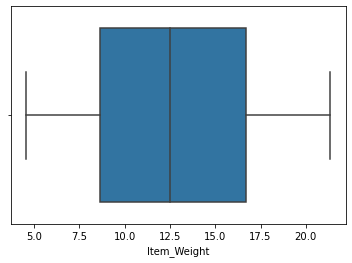

In [15]:
sns.boxplot(df_test['Item_Weight'])

C:\Users\N.Srinivas\anaconda new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_MRP'>

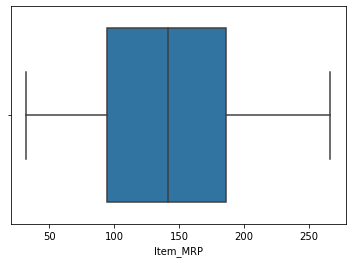

In [16]:
sns.boxplot(df_test['Item_MRP'])

#Filling Null Values

In [17]:
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(),inplace=True)

In [18]:
 df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [19]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace=True)

In [20]:
df_train['Outlet_Size'].mode()


0    Medium
Name: Outlet_Size, dtype: object

In [21]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [23]:
df_test['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [24]:
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0],inplace=True)

In [25]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


#removing unwanted features

In [26]:
df_train.drop(['Item_Identifier'],axis=1,inplace=True)

In [27]:

df_train.drop(['Outlet_Identifier'],axis=1,inplace=True)

In [28]:
#pip install dtale

In [29]:
#pip install Jinja2==3.0.3

In [30]:
import dtale

In [31]:
#from pandas_profiling import profileReport

In [32]:
#pip install pandas-profiling

In [33]:
#from pandas_profiling import profileReport

In [34]:

#pip install pandas-profiling==1.1.0

#EDA


In [35]:
from pandas_profiling import ProfileReport

In [36]:
correlate=df_train.corr()

In [37]:
correlate

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014168,0.024951,0.007739,0.009693
Item_Visibility,-0.014168,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024951,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,0.007739,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.009693,-0.128625,0.567574,-0.049135,1.000000


findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.


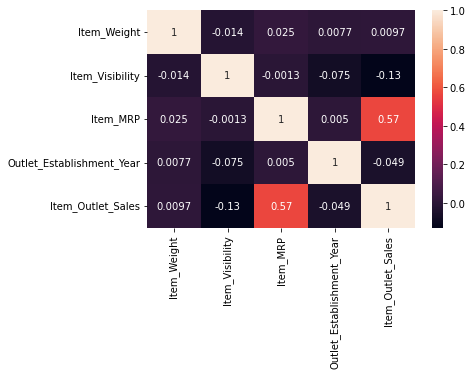

In [38]:
ax=sns.heatmap(correlate,annot=True)

In [39]:
import klib


In [40]:
klib.data_cleaning(df_train)

Shape of cleaned data: (8523, 10)Remaining NAs: 0

Changes:
Dropped rows: 0
     of which 0 duplicates. (Rows: [])
Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.43 MB (-66.15%)



,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.3,Low Fat,0.016047,Dairy,249.809204,1999,Medium,Tier 1,Supermarket Type1,3735.137939
1,5.92,Regular,0.019278,Soft Drinks,48.269199,2009,Medium,Tier 3,Supermarket Type2,443.422791
2,17.5,Low Fat,0.01676,Meat,141.617996,1999,Medium,Tier 1,Supermarket Type1,2097.27002
3,19.200001,Regular,0.0,Fruits and Vegetables,182.095001,1998,Medium,Tier 3,Grocery Store,732.380005
4,8.93,Low Fat,0.0,Household,53.861401,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.521805,1987,High,Tier 3,Supermarket Type1,2778.383301
8519,8.38,Regular,0.046982,Baking Goods,108.156998,2002,Medium,Tier 2,Supermarket Type1,549.284973
8520,10.6,Low Fat,0.035186,Health and Hygiene,85.122398,2004,Small,Tier 2,Supermarket Type1,1193.113647
8521,7.21,Regular,0.145221,Snack Foods,103.133202,2009,Medium,Tier 3,Supermarket Type2,1845.597656


In [41]:
categorical_features=[features for features in df_train.columns if df_train[features].dtype=='O' ]

In [42]:
categorical_features

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [43]:
Numerical_features=[features for features in df_train.columns if features not in categorical_features]

In [44]:
Numerical_features

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [45]:
import seaborn as sns

C:\Users\N.Srinivas\anaconda new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

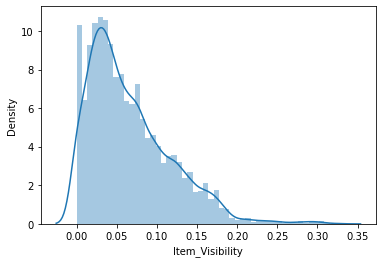

In [46]:
sns.distplot(df_train['Item_Visibility'])

In [47]:
x=np.log(df_train['Item_Visibility']+0.001)

C:\Users\N.Srinivas\anaconda new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

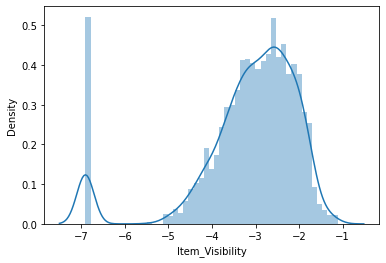

In [48]:
sns.distplot(x)

In [49]:
x1=df_train['Item_Visibility']**1/1.8

C:\Users\N.Srinivas\anaconda new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

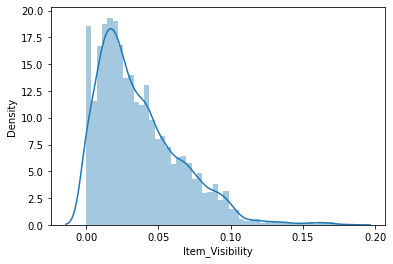

In [50]:
sns.distplot(x1)

In [51]:
#boxcox

C:\Users\N.Srinivas\anaconda new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Item_Weight'>

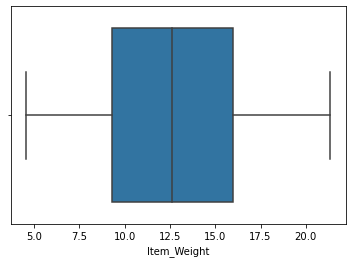

In [52]:
sns.boxplot(df_train['Item_Weight'])

C:\Users\N.Srinivas\anaconda new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Item_Visibility'>

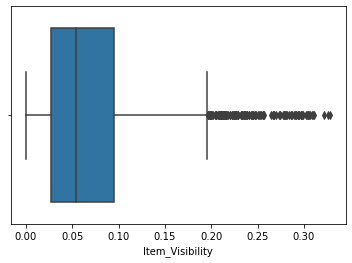

In [53]:
sns.boxplot(df_train['Item_Visibility'])

In [54]:
#outlier Removal

In [55]:
q3=df_train['Item_Visibility'].quantile(0.75)

In [56]:
q1=df_train['Item_Visibility'].quantile(0.25)

In [57]:
IQR=q3-q1

In [58]:
IQR

0.067595815

In [59]:
max_range=q3+(1.5*IQR)

In [60]:
min_range=q1-(1.5*IQR)

In [61]:
max_range

0.195979015

In [62]:
min_range

-0.07440424500000001

In [63]:
df_train.loc[df_train['Item_Visibility']>=max_range,'Item_Visibility']=max_range

C:\Users\N.Srinivas\anaconda new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Item_Visibility'>

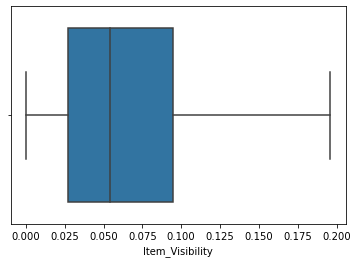

In [64]:
sns.boxplot(df_train['Item_Visibility'])

C:\Users\N.Srinivas\anaconda new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

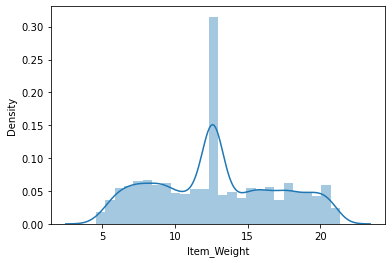

In [65]:
sns.distplot(df_train['Item_Weight'])

C:\Users\N.Srinivas\anaconda new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

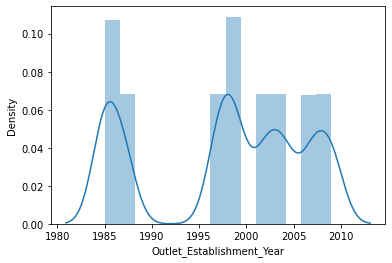

In [66]:
sns.distplot(df_train['Outlet_Establishment_Year'])

In [67]:
for features in categorical_features:
    print(f"The no of unique values in {features} is : {len(df_train[features].unique())}")
    print("THE UNIQUE VALUES ARE:",df_train[features].unique())
    print("**********************************")

The no of unique values in Item_Fat_Content is : 5
THE UNIQUE VALUES ARE: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
**********************************
The no of unique values in Item_Type is : 16
THE UNIQUE VALUES ARE: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
**********************************
The no of unique values in Outlet_Size is : 3
THE UNIQUE VALUES ARE: ['Medium' 'High' 'Small']
**********************************
The no of unique values in Outlet_Location_Type is : 3
THE UNIQUE VALUES ARE: ['Tier 1' 'Tier 3' 'Tier 2']
**********************************
The no of unique values in Outlet_Type is : 4
THE UNIQUE VALUES ARE: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
**********************************


In [68]:
#LABEL ENCODING


In [69]:
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [70]:
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [71]:
df_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [72]:
# x=pd.get_dummies(df_train['Item_Fat_Content'],drop_first=True)

In [73]:
# pd.concat([df_train,x],axis=1)

In [74]:
# df_train.head()

In [75]:
df_train['Item_Fat_Content'].replace("LF","Low Fat",inplace=True)

In [76]:
d={
    "High":3,
    "Medium":2,
    "Small":1
}

In [77]:
df_train['Item_Fat_Content'].replace("low fat","Low Fat",inplace=True)

In [78]:
df_train['Item_Fat_Content'].replace("reg","Regular",inplace=True)

In [79]:
df_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [80]:
d={
    "Tier 1":1,
    "Tier 2":2,
    "Tier 3":3
    
}

In [81]:
df_train['Outlet_Location_Type'].replace(d,inplace=True)

In [82]:
df_train['Outlet_Location_Type'].unique()

array([1, 3, 2], dtype=int64)

In [83]:
df_train['Outlet_Location_Type']

0       1
1       3
2       1
3       3
4       3
       ..
8518    3
8519    2
8520    2
8521    3
8522    1
Name: Outlet_Location_Type, Length: 8523, dtype: int64

In [84]:
d={
    "Grocery Store":0,
    "Supermarket Type1":1,
    "Supermarket Type2":2,
    "Supermarket Type3":3
}

In [85]:
df_train['Outlet_Type'].replace(d,inplace=True)

In [86]:
df_train['Outlet_Type'].unique()

array([1, 2, 0, 3], dtype=int64)

In [87]:
df_train['Outlet_Location_Type']

0       1
1       3
2       1
3       3
4       3
       ..
8518    3
8519    2
8520    2
8521    3
8522    1
Name: Outlet_Location_Type, Length: 8523, dtype: int64

In [88]:
d={
    "Tier 1":0,
    "Tier 2":1,
   
    "Tier 3":3
}

In [89]:
df_train['Outlet_Location_Type'].replace(d,inplace=True)

In [90]:
d={
    "High":3,
    "Medium":2,
    "Small":1
}

In [91]:
df_train['Outlet_Size'].replace(d,inplace=True)

In [92]:
d={
    "Low Fat":0,
    "Regular":1
}

In [93]:
df_train['Item_Fat_Content'].replace(d,inplace=True)

In [94]:
from sklearn import preprocessing   
obj = preprocessing.LabelEncoder()  

In [95]:
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,Dairy,249.8092,1999,2,1,1,3735.1380
1,5.920,1,0.019278,Soft Drinks,48.2692,2009,2,3,2,443.4228
2,17.500,0,0.016760,Meat,141.6180,1999,2,1,1,2097.2700
3,19.200,1,0.000000,Fruits and Vegetables,182.0950,1998,2,3,0,732.3800
4,8.930,0,0.000000,Household,53.8614,1987,3,3,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,Snack Foods,214.5218,1987,3,3,1,2778.3834
8519,8.380,1,0.046982,Baking Goods,108.1570,2002,2,2,1,549.2850
8520,10.600,0,0.035186,Health and Hygiene,85.1224,2004,1,2,1,1193.1136
8521,7.210,1,0.145221,Snack Foods,103.1332,2009,2,3,2,1845.5976


In [96]:
 df_train['Item_Type']= obj.fit_transform(df_train['Item_Type'])

In [97]:
 df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,4,249.8092,1999,2,1,1,3735.1380
1,5.920,1,0.019278,14,48.2692,2009,2,3,2,443.4228
2,17.500,0,0.016760,10,141.6180,1999,2,1,1,2097.2700
3,19.200,1,0.000000,6,182.0950,1998,2,3,0,732.3800
4,8.930,0,0.000000,9,53.8614,1987,3,3,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1987,3,3,1,2778.3834
8519,8.380,1,0.046982,0,108.1570,2002,2,2,1,549.2850
8520,10.600,0,0.035186,8,85.1224,2004,1,2,1,1193.1136
8521,7.210,1,0.145221,13,103.1332,2009,2,3,2,1845.5976


In [98]:
x2=pd.get_dummies(df_train, columns = ['Outlet_Size','Outlet_Location_Type','Outlet_Type'],drop_first=True)


x2


## x2=pd.get_dummies(df_train, columns = ['Outlet_Location_Type'],drop_first=True)

In [99]:
x2

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Size_2,Outlet_Size_3,Outlet_Location_Type_2,Outlet_Location_Type_3,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,9.300,0,0.016047,4,249.8092,1999,3735.1380,1,0,0,0,1,0,0
1,5.920,1,0.019278,14,48.2692,2009,443.4228,1,0,0,1,0,1,0
2,17.500,0,0.016760,10,141.6180,1999,2097.2700,1,0,0,0,1,0,0
3,19.200,1,0.000000,6,182.0950,1998,732.3800,1,0,0,1,0,0,0
4,8.930,0,0.000000,9,53.8614,1987,994.7052,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1987,2778.3834,0,1,0,1,1,0,0
8519,8.380,1,0.046982,0,108.1570,2002,549.2850,1,0,1,0,1,0,0
8520,10.600,0,0.035186,8,85.1224,2004,1193.1136,0,0,1,0,1,0,0
8521,7.210,1,0.145221,13,103.1332,2009,1845.5976,1,0,0,1,0,1,0


In [100]:
#FEATURE SELECTION

In [101]:
x2

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Size_2,Outlet_Size_3,Outlet_Location_Type_2,Outlet_Location_Type_3,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,9.300,0,0.016047,4,249.8092,1999,3735.1380,1,0,0,0,1,0,0
1,5.920,1,0.019278,14,48.2692,2009,443.4228,1,0,0,1,0,1,0
2,17.500,0,0.016760,10,141.6180,1999,2097.2700,1,0,0,0,1,0,0
3,19.200,1,0.000000,6,182.0950,1998,732.3800,1,0,0,1,0,0,0
4,8.930,0,0.000000,9,53.8614,1987,994.7052,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1987,2778.3834,0,1,0,1,1,0,0
8519,8.380,1,0.046982,0,108.1570,2002,549.2850,1,0,1,0,1,0,0
8520,10.600,0,0.035186,8,85.1224,2004,1193.1136,0,0,1,0,1,0,0
8521,7.210,1,0.145221,13,103.1332,2009,1845.5976,1,0,0,1,0,1,0


In [102]:
x2.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Size_2,Outlet_Size_3,Outlet_Location_Type_2,Outlet_Location_Type_3,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
Item_Weight,1.000000,-0.021092,-0.013744,0.028038,0.024951,0.007739,0.009693,-0.007479,0.015976,-0.007382,0.005174,0.011747,0.004956,-0.017723
Item_Fat_Content,-0.021092,1.000000,0.049342,-0.139434,0.006063,0.003151,0.018719,0.003495,-0.002132,-0.003272,0.000241,0.000533,0.002129,0.000183
Item_Visibility,-0.013744,0.049342,1.000000,-0.036213,-0.001163,-0.064105,-0.117918,-0.026731,-0.038385,-0.060900,0.009362,-0.129147,-0.030723,-0.048101
Item_Type,0.028038,-0.139434,-0.036213,1.000000,0.032651,0.004970,0.017048,0.006777,-0.003507,0.007172,-0.000878,0.001219,-0.000659,0.002413
Item_MRP,0.024951,0.006063,-0.001163,0.032651,1.000000,0.005020,0.567574,-0.010578,0.002438,0.001951,-0.000744,0.004885,0.003850,-0.006714
Outlet_Establishment_Year,0.007739,0.003151,-0.064105,0.004970,0.005020,1.000000,-0.049135,0.342251,-0.453388,0.540820,-0.333895,0.245070,0.466336,-0.538072
Item_Outlet_Sales,0.009693,0.018719,-0.117918,0.017048,0.567574,-0.049135,1.000000,0.075154,0.024170,0.058261,0.046376,0.108765,-0.038059,0.311192
Outlet_Size_2,-0.007479,0.003495,-0.026731,0.006777,-0.010578,0.342251,0.075154,1.000000,-0.438648,0.079437,0.183714,-0.313450,0.279224,0.280404
Outlet_Size_3,0.015976,-0.002132,-0.038385,-0.003507,0.002438,-0.453388,0.024170,-0.438648,1.000000,-0.244113,0.435419,0.254668,-0.122481,-0.122999
Outlet_Location_Type_2,-0.007382,-0.003272,-0.060900,0.007172,0.001951,0.540820,0.058261,0.079437,-0.244113,1.000000,-0.560639,0.506347,-0.243524,-0.244554


In [103]:
x2.shape

(8523, 14)

In [104]:
x2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   int64  
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   int32  
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Item_Outlet_Sales          8523 non-null   float64
 7   Outlet_Size_2              8523 non-null   uint8  
 8   Outlet_Size_3              8523 non-null   uint8  
 9   Outlet_Location_Type_2     8523 non-null   uint8  
 10  Outlet_Location_Type_3     8523 non-null   uint8  
 11  Outlet_Type_1              8523 non-null   uint8  
 12  Outlet_Type_2              8523 non-null   uint8  
 13  Outlet_Type_3              8523 non-null   uint8

In [105]:
x2.drop(['Outlet_Establishment_Year'],axis=1,inplace=True)

In [106]:
x2.drop(['Item_Visibility'],axis=1,inplace=True)

In [107]:
x2.corr()

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Item_Outlet_Sales,Outlet_Size_2,Outlet_Size_3,Outlet_Location_Type_2,Outlet_Location_Type_3,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
Item_Weight,1.000000,-0.021092,0.028038,0.024951,0.009693,-0.007479,0.015976,-0.007382,0.005174,0.011747,0.004956,-0.017723
Item_Fat_Content,-0.021092,1.000000,-0.139434,0.006063,0.018719,0.003495,-0.002132,-0.003272,0.000241,0.000533,0.002129,0.000183
Item_Type,0.028038,-0.139434,1.000000,0.032651,0.017048,0.006777,-0.003507,0.007172,-0.000878,0.001219,-0.000659,0.002413
Item_MRP,0.024951,0.006063,0.032651,1.000000,0.567574,-0.010578,0.002438,0.001951,-0.000744,0.004885,0.003850,-0.006714
Item_Outlet_Sales,0.009693,0.018719,0.017048,0.567574,1.000000,0.075154,0.024170,0.058261,0.046376,0.108765,-0.038059,0.311192
Outlet_Size_2,-0.007479,0.003495,0.006777,-0.010578,0.075154,1.000000,-0.438648,0.079437,0.183714,-0.313450,0.279224,0.280404
Outlet_Size_3,0.015976,-0.002132,-0.003507,0.002438,0.024170,-0.438648,1.000000,-0.244113,0.435419,0.254668,-0.122481,-0.122999
Outlet_Location_Type_2,-0.007382,-0.003272,0.007172,0.001951,0.058261,0.079437,-0.244113,1.000000,-0.560639,0.506347,-0.243524,-0.244554
Outlet_Location_Type_3,0.005174,0.000241,-0.000878,-0.000744,0.046376,0.183714,0.435419,-0.560639,1.000000,-0.636465,0.434369,0.436205
Outlet_Type_1,0.011747,0.000533,0.001219,0.004885,0.108765,-0.313450,0.254668,0.506347,-0.636465,1.000000,-0.480943,-0.482977


In [108]:
x=x2.drop('Item_Outlet_Sales',axis=1)

In [109]:
y=x2['Item_Outlet_Sales']

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [112]:
x

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size_2,Outlet_Size_3,Outlet_Location_Type_2,Outlet_Location_Type_3,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,9.300,0,4,249.8092,1,0,0,0,1,0,0
1,5.920,1,14,48.2692,1,0,0,1,0,1,0
2,17.500,0,10,141.6180,1,0,0,0,1,0,0
3,19.200,1,6,182.0950,1,0,0,1,0,0,0
4,8.930,0,9,53.8614,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,13,214.5218,0,1,0,1,1,0,0
8519,8.380,1,0,108.1570,1,0,1,0,1,0,0
8520,10.600,0,8,85.1224,0,0,1,0,1,0,0
8521,7.210,1,13,103.1332,1,0,0,1,0,1,0


In [113]:
x.describe()

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size_2,Outlet_Size_3,Outlet_Location_Type_2,Outlet_Location_Type_3,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.352693,7.226681,140.992782,0.610466,0.109351,0.326763,0.393054,0.654347,0.108882,0.109703
std,4.22724,0.477836,4.209990,62.275067,0.487673,0.312098,0.469057,0.488457,0.475609,0.311509,0.312538
min,4.55500,0.000000,0.000000,31.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.31000,0.000000,4.000000,93.826500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.60000,0.000000,6.000000,143.012800,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,16.00000,1.000000,10.000000,185.643700,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,21.35000,1.000000,15.000000,266.888400,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [114]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [115]:
x_train_std=sc.fit_transform(x_train)

In [116]:
x_test_std=sc.transform(x_test)

In [117]:
x_train_std

array([[-0.78945628,  1.34421592, -0.30212583, ...,  0.73041993,
        -0.35209326, -0.35445699],
       [ 1.22142058, -0.74392811,  0.41171057, ...,  0.73041993,
        -0.35209326, -0.35445699],
       [ 1.12679108,  1.34421592,  0.64965604, ...,  0.73041993,
        -0.35209326, -0.35445699],
       ...,
       [ 1.12679108, -0.74392811,  0.1737651 , ...,  0.73041993,
        -0.35209326, -0.35445699],
       [ 1.77736889, -0.74392811,  1.36349244, ...,  0.73041993,
        -0.35209326, -0.35445699],
       [ 0.8310739 , -0.74392811,  0.41171057, ...,  0.73041993,
        -0.35209326, -0.35445699]])

In [118]:
x_test_std

array([[ 0.34609771, -0.74392811, -0.5400713 , ...,  0.73041993,
        -0.35209326, -0.35445699],
       [-1.16087706, -0.74392811,  0.1737651 , ...,  0.73041993,
        -0.35209326, -0.35445699],
       [ 0.39341246,  1.34421592, -1.01596223, ...,  0.73041993,
        -0.35209326, -0.35445699],
       ...,
       [ 0.39341246,  1.34421592, -1.01596223, ...,  0.73041993,
        -0.35209326, -0.35445699],
       [-0.71848415,  1.34421592, -1.72979863, ..., -1.36907546,
         2.84015657, -0.35445699],
       [-1.16679141, -0.74392811, -0.5400713 , ...,  0.73041993,
        -0.35209326, -0.35445699]])

In [119]:
y_train

549     2386.2272
7757    3103.9596
764     1125.2020
6867     284.2966
2716    4224.5010
          ...    
5734     280.9676
5191    1301.6390
5390    6145.3340
860     1649.8524
7270     965.4100
Name: Item_Outlet_Sales, Length: 6818, dtype: float64

In [120]:
y_test

7503    1743.0644
2957     356.8688
7031     377.5086
1084    5778.4782
856     2356.9320
          ...    
7205    3004.0896
3257     890.8404
6346     629.1810
6318     253.0040
6339     976.7286
Name: Item_Outlet_Sales, Length: 1705, dtype: float64

In [121]:
#Model Building

In [169]:
import joblib

In [170]:
joblib.dump(sc,r'C:\Users\N.Srinivas\Desktop\Sales prediction ml project\model\sc.sav')

['C:\\Users\\N.Srinivas\\Desktop\\Sales prediction ml project\\model\\sc.sav']

In [122]:
#i.testing linear Regression

In [123]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [124]:
lr.fit(x_train_std,y_train)

LinearRegression()

In [125]:
y_pred_lr=lr.predict(x_test_std)

In [126]:
yt_pred=lr.predict(x_train_std)

In [127]:
from sklearn.metrics import r2_score

In [128]:
print(r2_score(y_train,yt_pred))

0.5578219817611567


In [129]:
import numpy as np

from sklearn.metrics import mean_squared_error

In [130]:
print((mean_squared_error(y_train,yt_pred)))

1307984.7911596072


In [131]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [132]:
print(r2_score(y_test,y_pred_lr))
print(mean_absolute_error(y_test,y_pred_lr))
print(np.sqrt(mean_squared_error(y_test,y_pred_lr)))

0.5798852656296152
791.5266005179186
1068.5781546350934


In [133]:
#ii.Testing Random Forest 

In [134]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [135]:
rf.fit(x_train_std,y_train)

RandomForestRegressor()

In [136]:
y_pred_rf=rf.predict(x_test_std)

In [137]:
print(r2_score(y_test,y_pred_rf))
print(mean_absolute_error(y_test,y_pred_rf))
print(np.sqrt(mean_squared_error(y_test,y_pred_rf)))

0.5241336671741776
788.0161614800056
1137.2732513917908


In [138]:
y_tr_rf=rf.predict(x_train_std)

In [139]:
print(np.sqrt(mean_squared_error(y_train,y_tr_rf)))

439.9320305591058


In [140]:
##predicted value
rf.predict([x_train_std[104]])

array([218.0495])

In [141]:
## actual value
np.array(y_train)[104]

223.7088

In [142]:
rf.predict([x_test_std[90]])

array([6087.136422])

In [143]:
## actual value
np.array(y_test)[90]

1547.3192

In [144]:
## iii.Testing Ridge Regression

In [145]:
from sklearn.linear_model import Ridge

In [146]:

ridge_model = Ridge(alpha = 0.5, normalize = False, tol = 0.001, \
              solver ='auto', random_state = 42)
ridge_model.fit(x_train, y_train)
  
# predicting the y_test
y_pred_ridge = ridge_model.predict(x_test)
  
# finding score for our model
score = ridge_model.score(x_test, y_test)
print("\n\nModel score : ", score)



Model score :  0.5798988880257805


C:\Users\N.Srinivas\anaconda new\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.



In [147]:
#iv.Decision Tree

In [148]:
from sklearn.tree import DecisionTreeRegressor

In [149]:
dt=DecisionTreeRegressor()

In [150]:
dt.fit(x_train_std,y_train)

DecisionTreeRegressor()

In [151]:
y_pred_dt=dt.predict(x_test_std)

In [152]:
print(r2_score(y_test,y_pred_dt))
print(mean_absolute_error(y_test,y_pred_dt))
print(np.sqrt(mean_squared_error(y_test,y_pred_dt)))

0.1717303594939974
1030.489704633431
1500.4039755954755


In [153]:
##HYPER PARAMETER TUNING FOR RA

In [154]:
from sklearn.metrics import explained_variance_score

In [155]:
from sklearn.model_selection import GridSearchCV

In [156]:
param_grid ={'bootstrap': [True],
 'max_depth': [10],
 'max_features': ['sqrt'],
 'min_samples_leaf': [4],
 'min_samples_split': [10],
 'n_estimators': [600]}

In [157]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [158]:
grid_search.fit(x_train_std, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10],
                         'max_features': ['sqrt'], 'min_samples_leaf': [4],
                         'min_samples_split': [10], 'n_estimators': [600]},
             verbose=2)

In [159]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 600}

In [160]:

y_preds = grid_search.predict(x_test_std)

In [161]:
mean_squared_error(y_test, y_preds)

1072107.682871817

In [162]:
print(r2_score(y_test, y_preds))
print(mean_absolute_error(y_test, y_preds))
print(np.sqrt(mean_squared_error(y_test, y_preds)))

0.6055483847891099
733.9825640497489
1035.4263290412393


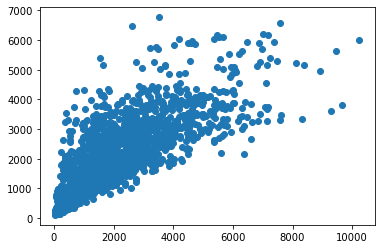

In [163]:
plt.scatter(y_test, y_preds)

In [171]:
joblib.dump(grid_search,r'C:\Users\N.Srinivas\Desktop\Sales prediction ml project\model\grid_search.sav')


['C:\\Users\\N.Srinivas\\Desktop\\Sales prediction ml project\\model\\grid_search.sav']

In [164]:
x

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size_2,Outlet_Size_3,Outlet_Location_Type_2,Outlet_Location_Type_3,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,9.300,0,4,249.8092,1,0,0,0,1,0,0
1,5.920,1,14,48.2692,1,0,0,1,0,1,0
2,17.500,0,10,141.6180,1,0,0,0,1,0,0
3,19.200,1,6,182.0950,1,0,0,1,0,0,0
4,8.930,0,9,53.8614,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,13,214.5218,0,1,0,1,1,0,0
8519,8.380,1,0,108.1570,1,0,1,0,1,0,0
8520,10.600,0,8,85.1224,0,0,1,0,1,0,0
8521,7.210,1,13,103.1332,1,0,0,1,0,1,0


In [165]:
print(y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


In [166]:
x
    

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size_2,Outlet_Size_3,Outlet_Location_Type_2,Outlet_Location_Type_3,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,9.300,0,4,249.8092,1,0,0,0,1,0,0
1,5.920,1,14,48.2692,1,0,0,1,0,1,0
2,17.500,0,10,141.6180,1,0,0,0,1,0,0
3,19.200,1,6,182.0950,1,0,0,1,0,0,0
4,8.930,0,9,53.8614,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,13,214.5218,0,1,0,1,1,0,0
8519,8.380,1,0,108.1570,1,0,1,0,1,0,0
8520,10.600,0,8,85.1224,0,0,1,0,1,0,0
8521,7.210,1,13,103.1332,1,0,0,1,0,1,0


In [167]:
from sklearn.model_selection import KFold 

In [168]:
k = 5
kf = KFold(n_splits=k, random_state=None)
 
for train_index , test_index in kf.split(x):
    x1_train , x1_test = x.iloc[train_index,:],x.iloc[test_index,:]
    y1_train , y1_test = y[train_index] , y[test_index]
    x1_train_std=sc.fit_transform(x1_train)
    x1_test_std=sc.fit_transform(x1_test)
     
    #clf.fit(x1_train_std,y1_train)
    pred_values = grid_search.predict(x1_test_std)
    print(r2_score(y1_test,pred_values))
    print(mean_absolute_error(y1_test,pred_values))
   
     
    
 

0.6424822276312412
758.5144373274107
0.6395274738409993
712.2142100015053
0.6218967816569334
728.05351972688
0.6559224354776316
707.5049048829335
0.6378977312025
740.9300431419324
